import library

In [57]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import spacy
import re
import numpy as np

download dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/text/email-spam/emails.csv")

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.shape

(5728, 2)

tokenize data

In [5]:
import re

text = "Hello, world! This is a test_123.    s *((*))"

# Find all word characters excluding numbers
matches = re.findall(r'[^\W\d_]{2,}', text)
print(matches)


['Hello', 'world', 'This', 'is', 'test']


In [6]:

tokenizer = spacy.blank('en')
def tokenize(text):
  matches = re.findall(r"[^\W\d_]{2,}",text)
  text  = ' '.join(matches)
  return tokenizer(text)
df['token'] =  df.text.apply(tokenize)

In [7]:
df.token

0       (Subject, naturally, irresistible, your, corpo...
1       (Subject, the, stock, trading, gunslinger, fan...
2       (Subject, unbelievable, new, homes, made, easy...
3       (Subject, color, printing, special, request, a...
4       (Subject, do, not, have, money, get, software,...
                              ...                        
5723    (Subject, re, research, and, development, char...
5724    (Subject, re, receipts, from, visit, jim, than...
5725    (Subject, re, enron, case, study, update, wow,...
5726    (Subject, re, interest, david, please, call, s...
5727    (Subject, news, aurora, update, aurora, versio...
Name: token, Length: 5728, dtype: object

clean text

In [8]:
# import and download library
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


lemmatize word to reduce vocab size

In [9]:
def lemmatize_fn(token_list):
  output = []
  for word in token_list:
      word = str(word)
      output.append(wnl.lemmatize(word.lower()))
  return output
df['lemmatized']= df.token.apply(lemmatize_fn)

In [10]:
df.lemmatized

0       [subject, naturally, irresistible, your, corpo...
1       [subject, the, stock, trading, gunslinger, fan...
2       [subject, unbelievable, new, home, made, easy,...
3       [subject, color, printing, special, request, a...
4       [subject, do, not, have, money, get, software,...
                              ...                        
5723    [subject, re, research, and, development, char...
5724    [subject, re, receipt, from, visit, jim, thank...
5725    [subject, re, enron, case, study, update, wow,...
5726    [subject, re, interest, david, please, call, s...
5727    [subject, news, aurora, update, aurora, versio...
Name: lemmatized, Length: 5728, dtype: object

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
eng_stopwords = stopwords.words('english')
for new_stopwords in ['epi','pm','etc','ect','st','hou','sf','fyi','ljm','mt','re','ok','cd','www','cc','ee','pls','subject','re']:
  eng_stopwords.append(new_stopwords)

print("number of stopwords:",len(eng_stopwords))
print(eng_stopwords[:5])

number of stopwords: 198
['i', 'me', 'my', 'myself', 'we']


In [13]:
def clean(list_lematized):
  return [ word  for word in list_lematized if word not in eng_stopwords]
df['cleaned'] = df.lemmatized.apply(clean)

In [14]:
df.cleaned.head()
for text_list in df.cleaned:
  print(text_list)

['naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'product', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'effort', 'become', 'much', 'effective', 'list', 'clear', 'benefit', 'creativeness', 'hand', 'made', 'original', 'logo', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'format', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'draft', 'within', 'three', 'business', 'day', 'affordability', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['fma', 'european', 'conference', 'john', 'book', 'arrived', 'shall', 'fedex', 'tonight', 'university', 'address', 'shown', 'bottom', 'message', 'still', 'fishing', 'paper', 'network', 'economy', 'vince', 'shirley', 'address', 'bottom', 'john', 'martin', 'vince', 'kaminski', 'enron', 'com', 'fma', 'european', 'conference', 'fine', 'want', 'change', 'anything', 'heard', 'guy', 'see', 'ya', 'john', 'wrote', 'john', 'thanks', 'stinson', 'able', 'join', 'u', 'dinner', 'opting', 'paper', 'due', 'big', 'workload', 'get', 'perspective', 'last', 'year', 'spent', 'enron', 'vince', 'john', 'martin', 'vkamins', 'enron', 'com', 'fma', 'european', 'conference', 'info', 'european', 'conference', 'file', 'john', 'date', 'tue', 'nov', 'karen', 'wright', 'fma', 'european', 'conference', 'kwright', 'fma', 'org', 'mailer', 'mozilla', 'en', 'win', 'accept', 'language', 'en', 'pdf', 'fma', 'european', 'conference', 'fifth', 'annual', 'european', 'meeting', 'financial', 'management', 'association', 'intern

build vocab

In [60]:
vocab = {
    'PAD':0
}
max_length = 0
count = 0
for text_list in df.cleaned:
  max_length = max(max_length,len(text_list))
  for word in text_list:
    if not vocab.get(word):
      count +=1
      vocab[word] = count



In [61]:
print(f"Vocab size: ",count)
print(f"Max length sentences: {max_length}")

Vocab size:  30897
Max length sentences: 4137


In [71]:
def text2index_pipeline(text):
  token_list = tokenize(text)
  lemmatized = lemmatize_fn(token_list)
  cleaned = clean(lemmatized)
  indices = []
  for word in cleaned:
    if vocab.get(word) is not None:
      indices.append(vocab[word])
    else:
      indices.append(count+1)
  num_padding = max_length - len(indices)
  if num_padding <= 0 :
    return indices[:max_length]
  indices.extend([0]*num_padding)
  return (np.array(indices)-count/2)/count

test = text2index_pipeline('I HAVE lots  BOY saasa ')
print(test.shape)
print(test.max())
print(test.min())

(4137,)
0.5000323656018384
-0.5


In [72]:
df['X'] = df.text.apply(text2index_pipeline)

create model

In [85]:
X = np.vstack(df.X.values)
Y = df.spam.values

In [86]:
print(X.shape)
print(Y.shape)

(5728, 4137)
(5728,)


In [87]:
print(Y)

[1 1 1 ... 0 0 0]


In [88]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [96]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4582, 4137)
(1146, 4137)
(4582,)
(1146,)


Accuracy:0.9232111692844677


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


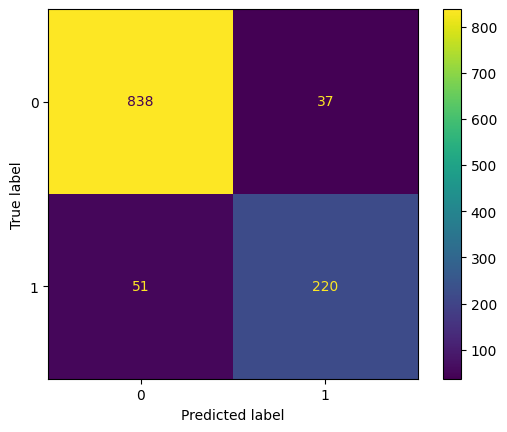

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

model = LogisticRegression()

model.fit(X_train, Y_train)

#predicting output for test data
pred = model.predict(X_test)

#accuracy score
print(f"Accuracy:{accuracy_score(Y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
